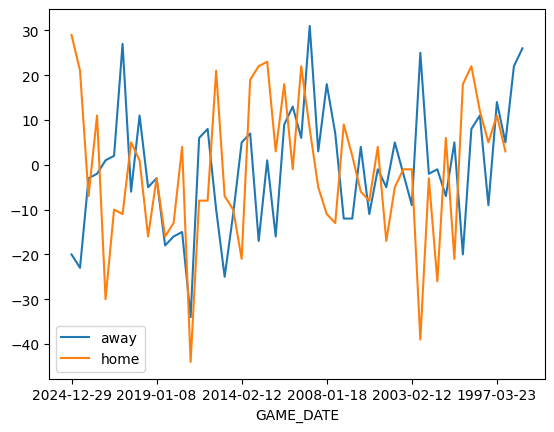

In [55]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder
import matplotlib.pyplot as plt
import pandas as pd



# i think is the function to get all the basic details of nba teams
def one_dict(list_dict):
    keys=list_dict[0].keys()
    outdict={key:[] for key in keys}

    for dict_ in list_dict:
        for key,value in dict_.items():
            outdict[key].append(value)
    return outdict

team=teams.get_teams()
dfdata=one_dict(team)
# print(team)

#converting the dict sent by one_dict to df
df=pd.DataFrame(dfdata)
# df.to_csv('nbateams.csv')
# print(df.head())
df1=df[df['nickname']=='Hawks']

# print(df1)
# print(df1.iloc[0,0])
id_hawk=df1[['id']].values[0,0]
# print(df1['nickname']=='Hawks')
# print(id_hawk)

## the following code will be to get game details for a particualar team (in my example it will be Hawks)

# using leaguegamefinder api to get the details of a particular team
gamefinder=leaguegamefinder.LeagueGameFinder(team_id_nullable=id_hawk)
# print(gamefinder.get_json()) 

# this will result in not the exact df but a list containing the df
hawks_df=gamefinder.get_data_frames()[0]
# print(hawks_df[0])

# hawks_df[0].to_csv('hawks_match_Details.csv')

# about to create two dfs for one at home vs raptors and another one at away

# match details at home vs TOR df
dfhhome=hawks_df[hawks_df['MATCHUP']=='ATL vs. TOR']
# print(dfhhome)

# match details at away vs TOR df
dfhaway=hawks_df[hawks_df['MATCHUP']=='ATL @ TOR']
# print(dfhaway)

# just to get the mean of the plus minus

# print(dfhhome['PLUS_MINUS'].mean())

# plotting their PLUS_MINUS vs the Game date

fig,ax=plt.subplots()

dfhhome.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
dfhaway.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
ax.legend(['away','home'])

plt.show()
